In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


# Pandas Printing Options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style('white')

# CHECK DIRECTORY

In [2]:
ls ..

README.md         css/              images/           js/
bower_components/ data/             index.html*       notebooks/


# DOWNLOAD DATA

In [3]:
!wget -O - 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' > ../data/nypd_collision_data.csv

--2017-03-08 16:55:30--  https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us... 52.206.68.26
Connecting to data.cityofnewyork.us|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘STDOUT’

-                       [     <=>            ] 180.01M  1.54MB/s    in 1m 44s  

Last-modified header invalid -- time-stamp ignored.
2017-03-08 16:57:15 (1.73 MB/s) - written to stdout [188752256]



# LOAD DATA

In [4]:
data = pd.read_csv("../data/nypd_collision_data.csv", low_memory=False)

# CREATE DATETIME COLUMN

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

# SET DATETIME AS INDEX

In [6]:
data = data.set_index('DATE')

# HIGHLEVEL INFORMATION

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 990267 entries, 2017-02-09 17:15:00 to 2012-07-01 09:15:00
Data columns (total 28 columns):
TIME                             990267 non-null object
BOROUGH                          729718 non-null object
ZIP CODE                         729617 non-null float64
LATITUDE                         788840 non-null float64
LONGITUDE                        788840 non-null float64
LOCATION                         788840 non-null object
ON STREET NAME                   802215 non-null object
CROSS STREET NAME                772888 non-null object
OFF STREET NAME                  73911 non-null object
NUMBER OF PERSONS INJURED        990267 non-null int64
NUMBER OF PERSONS KILLED         990267 non-null int64
NUMBER OF PEDESTRIANS INJURED    990267 non-null int64
NUMBER OF PEDESTRIANS KILLED     990267 non-null int64
NUMBER OF CYCLIST INJURED        990267 non-null int64
NUMBER OF CYCLIST KILLED         990267 non-null int64
NUMBER OF MOTORIST 

In [8]:
# # NOTE: data starting 2013-01-01 and ending in 2017-02-28
print(data.index.min())
print(data.index.max())

2012-07-01 00:05:00
2017-03-04 23:50:00


# FILTER FOR COLLISIONS WITH PEDESTRIANS INJURED 

In [9]:
data = data[data['NUMBER OF PEDESTRIANS INJURED']!=0]

### INJURIES 2012-07-01 TO 2017/02/28

In [10]:
# SAVE FULL DATA FOR USE LATER
injuries_till_2017 = data['2012-07-01':'2017/02/28']
injuries_till_2017.to_csv("../data/injuries_till_2017.csv")

### INJURIES 2013-01-01 to 2016/12/31

In [11]:
injuries_2013_2016 = data['2013-01-01':'2016/12/31']
injuries_2013_2016.to_csv("../data/injuries_2013_2016.csv")

# FILTER DATA FOR THIS NOTEBOOK

In [12]:
data = data['2013/01/01':'2017/02/28']
data.shape

(43861, 28)

# NUM PEDESTRIANS INJURED FROM AUTO COLLISIONS

In [13]:
monthly_injured = data.resample('M')['NUMBER OF PEDESTRIANS INJURED'].sum()
monthly_injured[:10]

DATE
2013-01-31    1113
2013-02-28     984
2013-03-31     987
2013-04-30     901
2013-05-31     982
2013-06-30     972
2013-07-31     854
2013-08-31     853
2013-09-30     999
2013-10-31    1066
Freq: M, Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

In [14]:
daily_injured = data.resample('D')['NUMBER OF PEDESTRIANS INJURED'].sum()
daily_injured[:10]

DATE
2013-01-01    34
2013-01-02    22
2013-01-03    43
2013-01-04    31
2013-01-05    28
2013-01-06    25
2013-01-07    38
2013-01-08    30
2013-01-09    40
2013-01-10    51
Freq: D, Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

# DAILY INJURED DESCRIPTIVE STATS

In [15]:
daily_injured.describe()

count   1520.000
mean      31.585
std       13.959
min        3.000
25%       23.000
50%       29.500
75%       37.000
max      228.000
Name: NUMBER OF PEDESTRIANS INJURED, dtype: float64

# FILTER BY BORO

In [16]:
borough_injuries_month = data.groupby([data.index.month, data.BOROUGH])['NUMBER OF PEDESTRIANS INJURED'].sum().unstack()

# NUM PEDESTRIANS INJURED BY DAY FROM AUTO COLLISIONS

In [17]:
# borough_injuries_year = data.groupby([data.index.year, data.BOROUGH])['NUMBER OF PEDESTRIANS INJURED'].sum().unstack()
borough_injuries_daily = data.groupby([data.index.day, data.BOROUGH])['NUMBER OF PEDESTRIANS INJURED'].sum().unstack()

# CLEANUP DATA

In [18]:
borough_by_biggest_population = ['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
borough_injuries_month = borough_injuries_month[borough_by_biggest_population]

In [19]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_abbr = [m[:3] for m in months]

borough_injuries_month.index = months
borough_injuries_month

BOROUGH    MANHATTAN  BROOKLYN  QUEENS  BRONX  STATEN ISLAND
January         1162      1677    1184    699            159
February        1022      1168     772    575            122
March            841      1073     718    511             83
April            777      1008     629    503             79
May              798      1064     660    494             85
June             762      1026     637    466             75
July             695       875     558    429             72
August           854      1134     672    524             76
September        753      1009     736    488             69
October          862      1227     894    563             96
November         855      1254     948    564            115
December         940      1358     994    571             83

# PLOT RESULTS

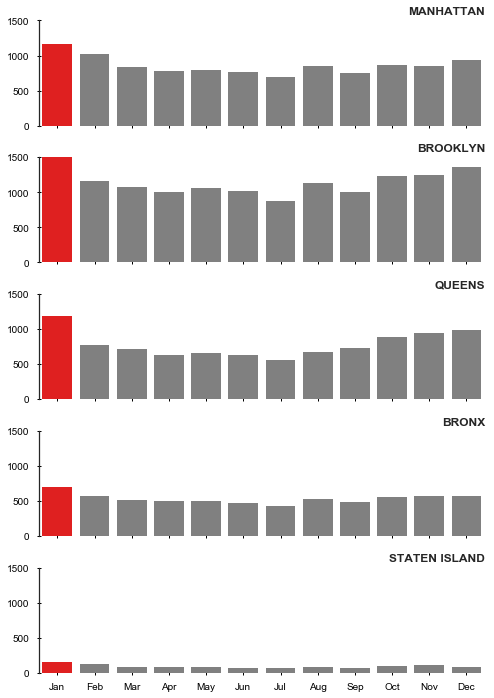

In [20]:
sns.set(style="white")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(8, 12), sharex=True, sharey=True)
f.subplots_adjust(hspace=.3)

for boro, ax in zip(borough_injuries_month, [ax1, ax2, ax3, ax4, ax5]):
    values = borough_injuries_month[boro].values
    colors = ['gray' if (x < max(values)) else 'red' for x in values]
    sns.barplot(months_abbr, borough_injuries_month[boro], palette=colors, ax=ax)
    ax.set_title(boro, loc='right', weight='bold', fontdict={'fontsize': 12})
    ax.set_ylabel('')
    ax.tick_params(direction='inout', length=4, width=1, colors='black')
    sns.despine(bottom=True)

plt.ylim(0, 1500)
plt.show();

# MONTHLY INJURIES BY BOROUGH

In [21]:
borough_injuries_month

BOROUGH    MANHATTAN  BROOKLYN  QUEENS  BRONX  STATEN ISLAND
January         1162      1677    1184    699            159
February        1022      1168     772    575            122
March            841      1073     718    511             83
April            777      1008     629    503             79
May              798      1064     660    494             85
June             762      1026     637    466             75
July             695       875     558    429             72
August           854      1134     672    524             76
September        753      1009     736    488             69
October          862      1227     894    563             96
November         855      1254     948    564            115
December         940      1358     994    571             83

# DAILY INJURIES BY BOROUGH

In [22]:
borough_injuries_daily

BOROUGH  BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
1          217       456        352     316             44
2          187       479        307     271             34
3          234       481        351     351             28
4          244       475        284     320             50
5          181       484        323     284             41
6          211       490        351     333             42
7          213       431        329     346             30
8          194       454        333     305             33
9          176       438        299     274             30
10         182       486        383     298             46
11         219       475        316     319             33
12         197       477        366     288             28
13         189       447        330     312             26
14         213       427        363     311             45
15         201       475        349     305             31
16         196       449        425     328             44
17         234       489        373     311             56
18         227       459        348     281             33
19         203       459        369     284             44
20         210       490        356     323             54
21         218       405        335     293             28
22         200       409        329     339             43
23         264       559        390     351             40
24         240       474        337     307             32
25         176       385        282     236             34
26         247       453        307     317             15
27         212       437        349     283             34
28         207       404        319     310             25
29         204       390        262     311             35
30         177       377        320     310             38
31         114       259        184     185             18

# SAVE

### TO CSV

In [23]:
# CSV verison
data.to_csv("../data/injuries_2013_present.csv")

### TO JSON

In [24]:
def serise_to_json(data):
    dates = np.array(data.index.values, dtype=np.datetime64)
    values = data.values
    dates_str = [str(i)[:10] for i in dates]
    return [{'date': d, 'value': int(v)} for d, v in zip(dates_str, values)]

### Monthly 

In [25]:
monthly_json = serise_to_json(monthly_injured)
monthly_json[:5]

[{'date': '2013-01-31', 'value': 1113},
 {'date': '2013-02-28', 'value': 984},
 {'date': '2013-03-31', 'value': 987},
 {'date': '2013-04-30', 'value': 901},
 {'date': '2013-05-31', 'value': 982}]

In [26]:
monthly_outname = '../data/monthly_injured_2013_present.json'
with open(monthly_outname, 'w') as outfile:
    json.dump(monthly_json, outfile)

### Daily

In [27]:
daily_json = serise_to_json(daily_injured)

In [28]:
daily_outname = '../data/daily_injured_2013_present.json'
with open(daily_outname, 'w') as outfile:
    json.dump(daily_json, outfile)

# MOST DANGEROUS DAY

In [29]:
# 2017-01-23 - 228 PEDESTRIANS INJURIES
pd.DataFrame(daily_json).sort_values(by='value', ascending=False)[:10]

date  value
1483  2017-01-23    228
1484  2017-01-24    133
1477  2017-01-17    105
329   2013-11-26    103
1052  2015-11-19    103
1395  2016-10-27    101
1463  2017-01-03     98
339   2013-12-06     90
1428  2016-11-29     89
694   2014-11-26     86